<a href="https://colab.research.google.com/github/fadekemiatitebi/Machine-Learning/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
data = pd.read_csv('Twitter_Data.csv')
data.head() 

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
data.info

<bound method DataFrame.info of                                               clean_text  category
0      when modi promised “minimum government maximum...      -1.0
1      talk all the nonsense and continue all the dra...       0.0
2      what did just say vote for modi  welcome bjp t...       1.0
3      asking his supporters prefix chowkidar their n...       1.0
4      answer who among these the most powerful world...       1.0
...                                                  ...       ...
98387  hahaha she supports modi and the bjp india for...       1.0
98388  dear all indian brothers and sisters beginning...       1.0
98389  thought was first clear proof modi’ multiple p...       1.0
98390  nirav modi possibly owns two flats not one lon...       0.0
98391            the race lies modi win elections hope i       NaN

[98392 rows x 2 columns]>

In [10]:
len(data)

98392

In [11]:
#Why do we need to seperate the data? I think we need both the text and the category
tweets = data.iloc[:, [0, 1]]
tweets.head() 

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [12]:
sentiment = data.iloc[:, -1]
sentiment.head() 

0   -1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: category, dtype: float64

In [ ]:
#Check for null Values
data.isnull().sum()

clean_text     4
category      11
dtype: int64

In [ ]:
#Remove null values
data.dropna()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
154899,why these 456 crores paid neerav modi not reco...,-1.0
154900,dear rss terrorist payal gawar what about modi...,-1.0
154901,did you cover her interaction forum where she ...,0.0
154902,there big project came into india modi dream p...,0.0


In [ ]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

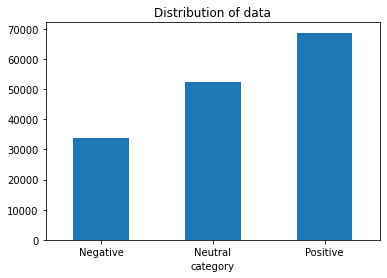

In [ ]:
ax = data.groupby('category').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Neutral', 'Positive'], rotation=0)

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

LookupError: ignored

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer() 

In [ ]:
import re

cleaned_data = []

for i in range(len(data)):
    X = re.sub('[^a-zA-Z]', ' ', str(tweets.iloc[i]))
    X = X.lower().split()
    X = [stemmer.stem(word) for word in X if word not in stop_words]
    X = ' '.join(X)
    cleaned_data.append(X) 

NameError: ignored

In [ ]:
X = pd.DataFrame(cleaned_data)
X.head()

,0
0,respond go
1,sooo sad miss san diego
2,boss bulli
3,interview leav alon
4,son put releas alreadi bought


In [ ]:
X.shape

(27481, 1)

In [ ]:
sentiment.shape

(27481,)

In [ ]:
#Remove Punctuation and Special Characters
